# Amplitude do gradiente da anomalia de campo total produzida por uma esfera

Este código utiliza a biblioteca de modelagem e inversão de dados geofísicos denominada [Fatiando a Terra](http://www.fatiando.org/index.html).

### Coisas para importar

In [1]:
%matplotlib inline
import numpy as np
from fatiando import mesher, gridder, utils
from fatiando.gravmag import prism
from fatiando.vis import mpl

### Inclinação e a declinação do campo geomagnético local

In [2]:
inc = 56. # graus
dec = -60. # graus
amp = 23500.0 # nT

In [3]:
F = utils.ang2vec(amp, inc, dec) # vetor campo geomagnético local

In [4]:
print F

[  6570.51661578 -11380.46861051  19482.38295504]


### Modelo de corpo esférico

In [5]:
incs = inc # inclinacao da magnetizacao do corpo (em graus)
decs = 0. # declinacao da magnetizacao do corpo (em graus)
amps = 10. # intensidade da magnetizacao do corpo (em A/m)

In [6]:
model = [mesher.Prism(-500., 500., -500., 500., 10., 1010., \
                      {'magnetization': utils.ang2vec(amps, incs, decs)}),
         mesher.Prism(-2000., -1500., -500., 500., 10., 1010., \
                      {'magnetization': utils.ang2vec(amps, incs, decs)})]

In [7]:
# Projeção horizontal do modelo
projecao = []
for i, p in enumerate(model):
    projecao.append(p.get_bounds()[:4])

### Pontos onde são calculados os dados

In [8]:
shape = (100, 100) # número de pontos ao longo de x e y
area = (-5000, 5000, -5000, 5000) # x mínimo, x máximo, y mínimo e y máximo da área
xp, yp, zp = gridder.regular(area, shape, z=-100) # grade regular localizada em z = -100 m

### Anomalia de campo total (em nT)

In [9]:
act = prism.tf(xp, yp, zp, model, inc, dec)

### Derivadas espaciais da anomalia de campo total (em nT/m)

In [10]:
delta = 10.

dx_act = (prism.tf(xp + delta, yp, zp, model, inc, dec) - \
          prism.tf(xp - delta, yp, zp, model, inc, dec))/(2.*delta)

dy_act = (prism.tf(xp, yp + delta, zp, model, inc, dec) - \
          prism.tf(xp, yp - delta, zp, model, inc, dec))/(2.*delta)

dz_act = (prism.tf(xp, yp, zp + delta, model, inc, dec) - \
          prism.tf(xp, yp, zp - delta, model, inc, dec))/(2.*delta)

### Amplitude do gradiente total

In [11]:
grad = np.sqrt(dx_act**2 + dy_act**2 + dz_act**2)

### Figuras

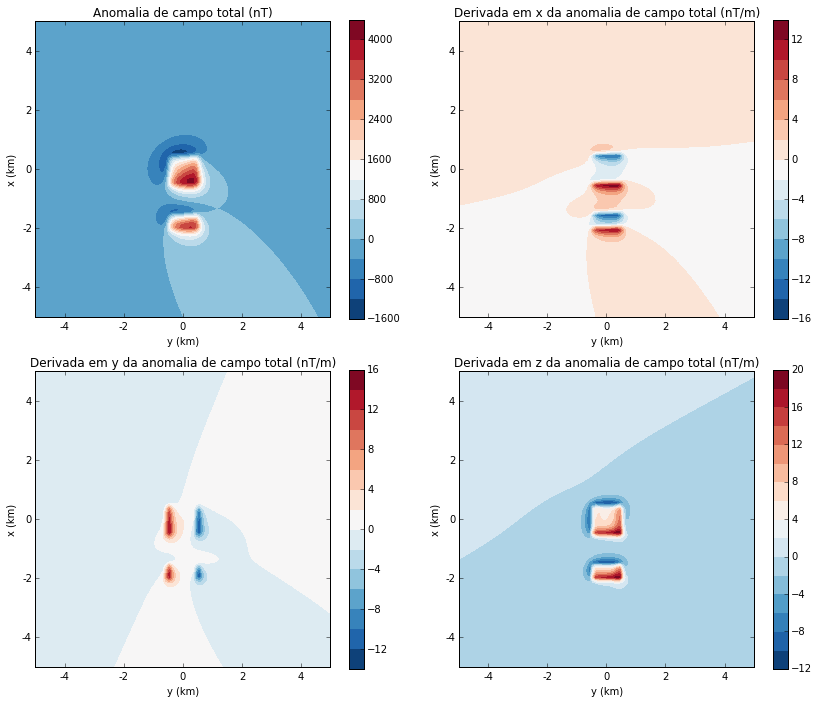

In [12]:
mpl.close('all')
mpl.figure(figsize=(12,10))

mpl.subplot(2,2,1)
mpl.title("Anomalia de campo total (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, act, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,2,2)
mpl.title("Derivada em x da anomalia de campo total (nT/m)")
mpl.axis('scaled')
mpl.contourf(yp, xp, dx_act, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,2,3)
mpl.title("Derivada em y da anomalia de campo total (nT/m)")
mpl.axis('scaled')
mpl.contourf(yp, xp, dy_act, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,2,4)
mpl.title("Derivada em z da anomalia de campo total (nT/m)")
mpl.axis('scaled')
mpl.contourf(yp, xp, dz_act, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.tight_layout(pad = 2.)

mpl.show()

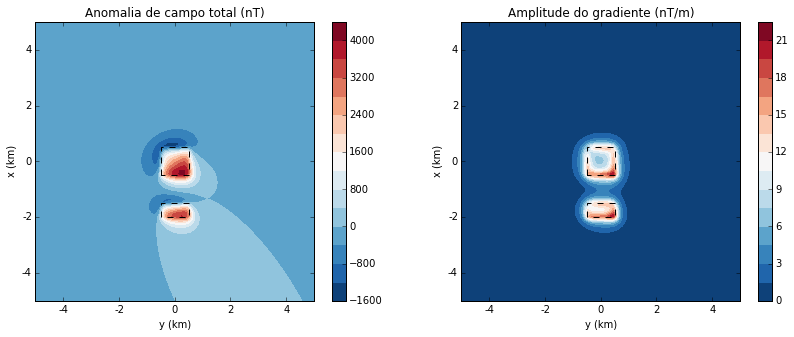

In [13]:
mpl.close('all')
mpl.figure(figsize=(14,5))

mpl.subplot(1,2,1)
mpl.title("Anomalia de campo total (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, act, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(1,2,2)
mpl.title("Amplitude do gradiente (nT/m)")
mpl.axis('scaled')
mpl.contourf(yp, xp, grad, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
for i, sq in enumerate(projecao):
    mpl.square(sq, style='--k', linewidth=1.0, xy2ne=True)
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.savefig('')